In [3]:
# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# qual GPU estou usando
!nvidia-smi

Sun Aug 13 12:47:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#
!pip install diffusers==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00


In [5]:
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

In [6]:
import torch
from diffusers import StableDiffusionPipeline

In [6]:
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4', torch_dtype=torch.float16)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
pipe = pipe.to('cuda')

In [ ]:
pipe = pipe.to('cuda')

# otimização de recursos
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
# primeira imagem

In [ ]:
# Prompt
prompt = 'an orange'

In [ ]:
# imagem
img = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
type(img)

PIL.Image.Image

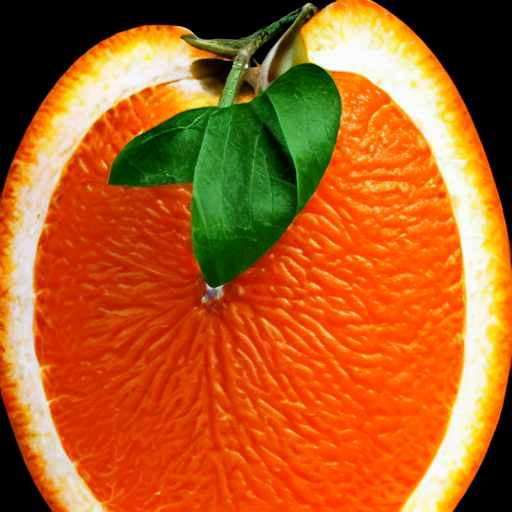

In [ ]:
img

  0%|          | 0/50 [00:00<?, ?it/s]

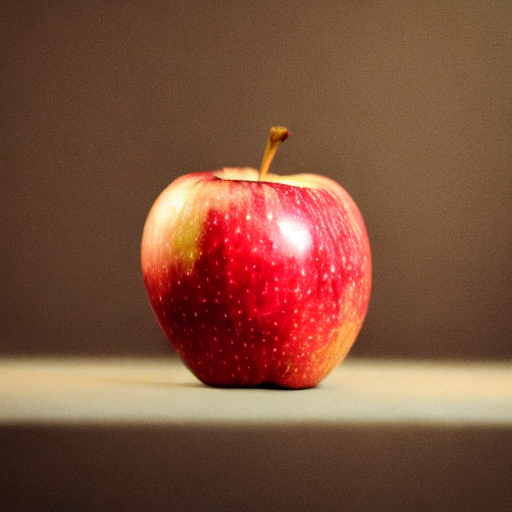

In [ ]:
# Prompt
prompt = 'photograph of an apple'
img = pipe(prompt).images[0]
img

In [ ]:
# salvar a imagem
img.save('Resultado.png')

  0%|          | 0/50 [00:00<?, ?it/s]

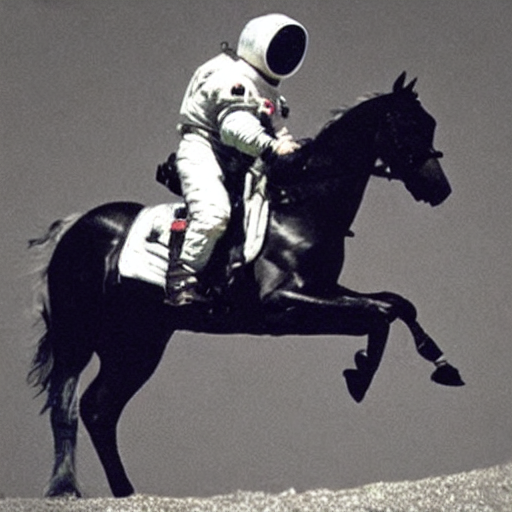

In [ ]:
prompt = 'a photograph of an astronaut riding a horse'
img = pipe(prompt).images[0]
img

In [ ]:
# salvar a imagem
img.save('Resultado.png')

In [ ]:
# gerando varias imagens
from PIL import Image

def grid_img(imgs, rows, cols, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w * scale), int(h * scale)

  grid = Image.new('RGB', size = (cols * w, rows * h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
    img = img.resize((w, h), Image.ANTIALIAS)
    grid.paste(img, box = (i % cols * w, i // cols * h))

  return grid

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-34-9afcd366ce36>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w, h), Image.ANTIALIAS)


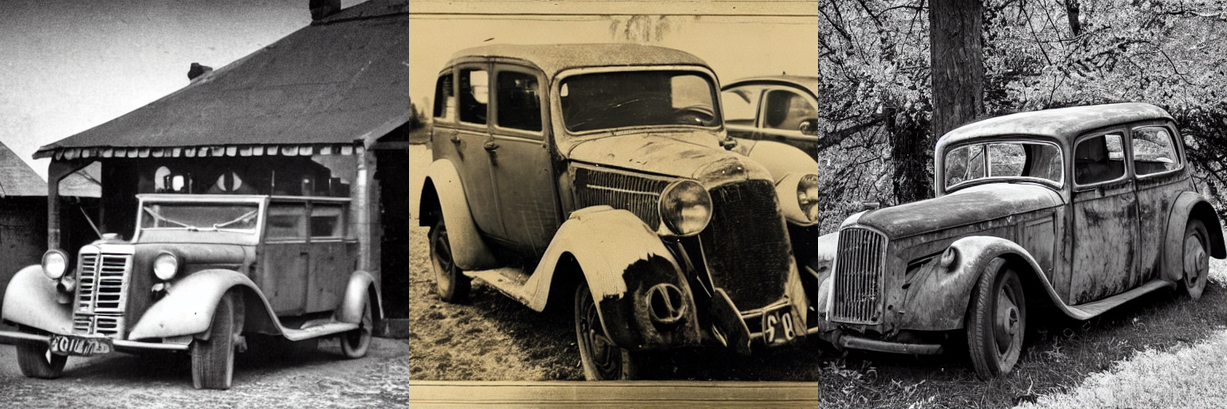

In [ ]:
num_imgs = 3
prompt = 'photograph of an old car'
imgs = pipe(prompt, num_images_per_prompt=num_imgs).images
grid = grid_img(imgs, rows=1, cols=3, scale=0.80)
grid

In [9]:
#imagem para imagem
from diffusers import StableDiffusionImg2ImgPipeline

In [10]:
device = 'cuda'
pipe = StableDiffusionImg2ImgPipeline.from_pretrained('runwayml/stable-diffusion-v1-5', torch_dtype=torch.float16)
pipe = pipe.to(device)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 27 files:   0%|          | 0/27 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [11]:
# otimização de recursos
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [12]:
seed = 222

In [ ]:
# carregando imagem modelo
from PIL import Image
init_img = Image.open('/content/img_1.jpg')
init_img.thumbnail((512, 512))
init_img

In [24]:
# primeiros resultados
prompt = 'dramatic photography of an men, color'

  0%|          | 0/40 [00:00<?, ?it/s]

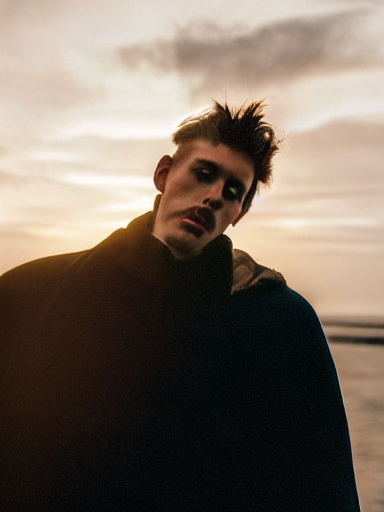

In [26]:
#generator=torch.Generator(device=device).manual_seed(seed)
img=pipe(prompt=prompt, image=init_img, generator=generator).images[0]
img

In [27]:
img.save('resultado.png')

In [ ]:
# alterando a imagem de entrada

  0%|          | 0/40 [00:00<?, ?it/s]

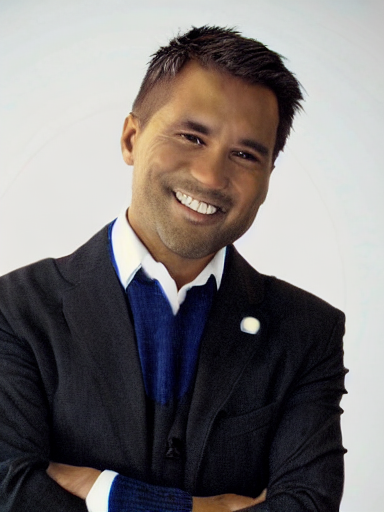

In [29]:
prompt = 'a men of business'
#generator=torch.Generator(device=device).manual_seed(seed)
img=pipe(prompt=prompt, image=init_img, strength=0.8, generator=generator).images[0]
img

In [1]:
!pip install diffusers==0.19.0

In [9]:
# edição da imagem enviada
from diffusers import StableDiffusionInstructPix2PixPipeline
from diffusers import EulerAncestralDiscreteScheduler
import torch

model_id = "timbrooks/instruct-pix2pix"
instruct =  StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", safety_checker=None)
instruct.to("cuda")
instruct.scheduler = EulerAncestralDiscreteScheduler.from_config(instruct.scheduler.config)

instruct.enable_attention_slicing()
instruct.enable_xformers_memory_efficient_attention()

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_instruct_pix2pix.StableDiffusionInstructPix2PixPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
# carregando imagem modelo
from PIL import Image
init_img = Image.open('/content/img_2.jpg')
init_img.thumbnail((512, 512))
init_img

  0%|          | 0/20 [00:00<?, ?it/s]

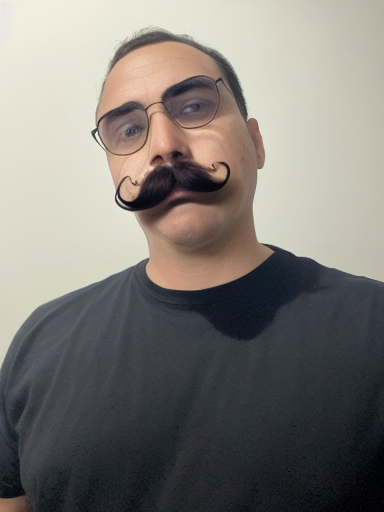

In [40]:
prompt = 'give him a moustache'
result_img = instruct(prompt,
                      image=init_img,
                      num_inference_steps=20,
                      image_guidance_scale=1).images[0]
result_img

In [14]:
result_img.save('result.png')

  0%|          | 0/20 [00:00<?, ?it/s]

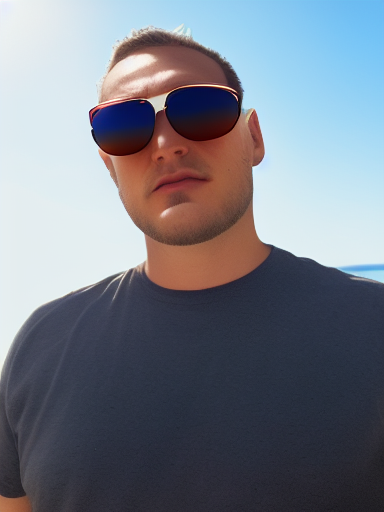

In [46]:
prompt = 'give him sunglasses'
result_img = instruct(prompt,
                      image=init_img,
                      num_inference_steps=20,
                      image_guidance_scale=1).images[0]
result_img

In [34]:
result_img.save('result.png')

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.